# Tutorial 2

## Density Analysis

Understanding the positions of atoms in a material is incredibly useful when studying things like atomic structure and defect segregation. Consider a system with an interface, it may be interesting to know how the distributions of the materials atoms change at that interface, e.g is there an increase or decrease in the amount of a certain species at the interface and does this inform you about any segregation behaviour? 

This module of polypy allows the positions of atoms in a simulation to be evaluated in one and two dimensions, this can then be converted into a charge density and (in one dimension) the electric field and electrostatic potential.

In [1]:
from polypy.read import History
from polypy.density import Density
from polypy import analysis
from polypy import utils as ut
from polypy import plotting

import numpy as np
import matplotlib.pyplot as plt

The first step is to read the data. We want the data for both species so need to provide a list of the species. This is a simple example for fluorite CaF$_2$. Included in the documentation is an example that analyses the distribution of atoms at a grain boundary of cerium oxide (CeO$_2$). 

```
["CA", "F"]
```

In [2]:
history = History("../example_data/HISTORY", ["CA", "F"])

The next step is to create the density object for both species.

In [3]:
ca_density = Density(history.trajectory, atom="CA", histogram_size=0.1)
f_density = Density(history.trajectory, atom="F", histogram_size=0.1)

## One Dimension

### Particle Density

The one_dimensional_density function will take a direction which corresponds to a dimension of the simulation cell. For example, 'x' corresponds to the first lattice vector. The code will calculate the total number of a species in 0.1 $AA$ histograms along the first cell dimension.

The function will return the positions of the histograms and the total number of species. To be clear These can then be plotted with the one_dimensional_plot function which takes a list of histograms values, a list of y values and a list of labels. 

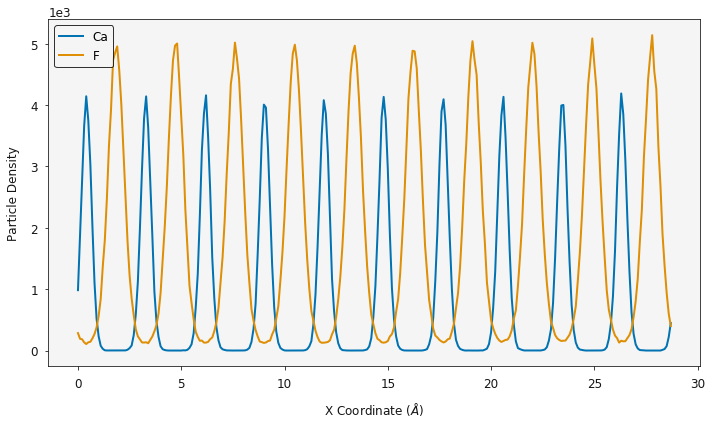

In [4]:
cx, cy, c_volume = ca_density.one_dimensional_density(direction="z")
fx, fy, f_volume = f_density.one_dimensional_density(direction="z")

ax = plotting.one_dimensional_density_plot([cx, fx], [cy, fy], ["Ca", "F"])
plt.show()


### Charge Density

The number densities can be combined with the particle charges to generate the one dimensional charge density according to 

\begin{align}
\rho_q(z) = \sum_{i} q_i \rho_i(z)
\end{align}

where $\rho_{i}$ is the number density of atom i and $q_{i}$ is its charge.  

The OneDimensionalChargeDensity class is used for the charge density, electric field and electrostatic potneial. It requires a list of number densities, list of charges and the histogram volume. 

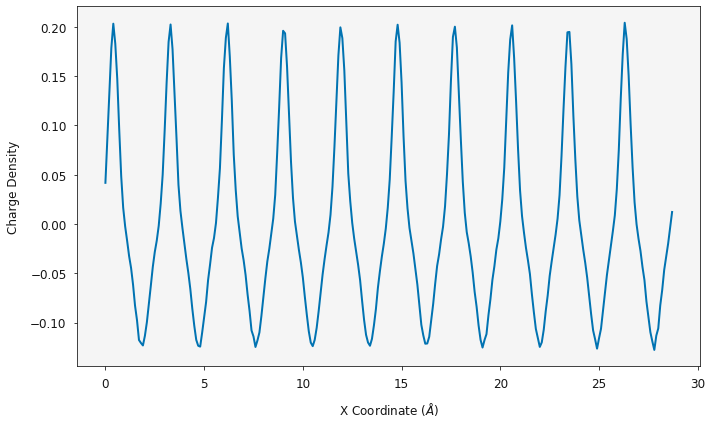

In [5]:
charge = analysis.OneDimensionalChargeDensity(fx, [fy, cy], [-1.0, 2.0], c_volume, history.trajectory.timesteps)

dx, charge_density = charge.calculate_charge_density()

ax = plotting.one_dimensional_charge_density_plot(dx, charge_density)
plt.show()

### Electric Field and Electrostatic Potential

The charge density can be converted into the electric field and the electrostatic potential.

\begin{align}
E(z) = \frac{1}{- \epsilon_{0}} \int_{z_{0}}^{z} \rho_{q}(z')dz'
\end{align}


\begin{align}
\Delta_{\psi}(z) = \int_{z_{0}}^{z} E(z')dz'
\end{align}

The calculate_electric_field and calculate_electrostatic_potential functions will take the bin positions, and the charge density and return the electric field and the electrostatic potential. 

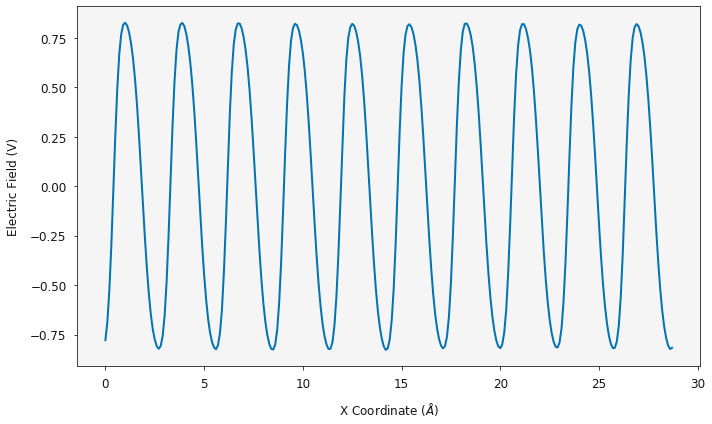

In [6]:
dx, electric_field = charge.calculate_electric_field()

ax = plotting.electric_field_plot(dx, electric_field)
plt.show()

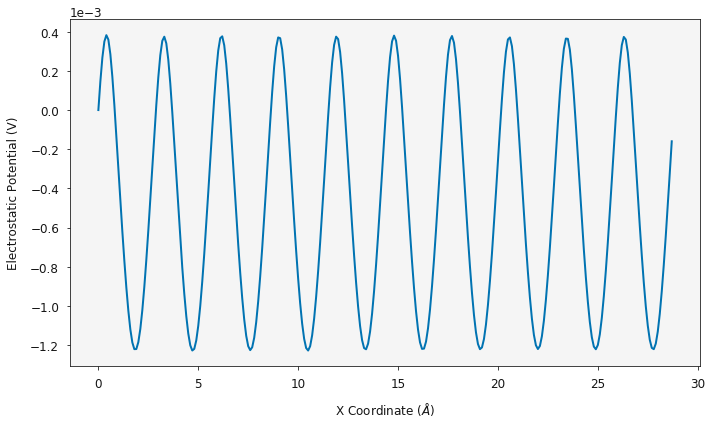

In [7]:
dx, electrostatic_potential = charge.calculate_electrostatic_potential()

ax = plotting.electrostatic_potential_plot(dx, electrostatic_potential)
plt.show()


## Two Dimensions

### Particle Density

The particle density can be evaluated in two dimensions. The two_dimensional_density function will calculate the total number of species in cuboids. The coordinates in x and y of the box are returned and a grid of species counts are returned. 

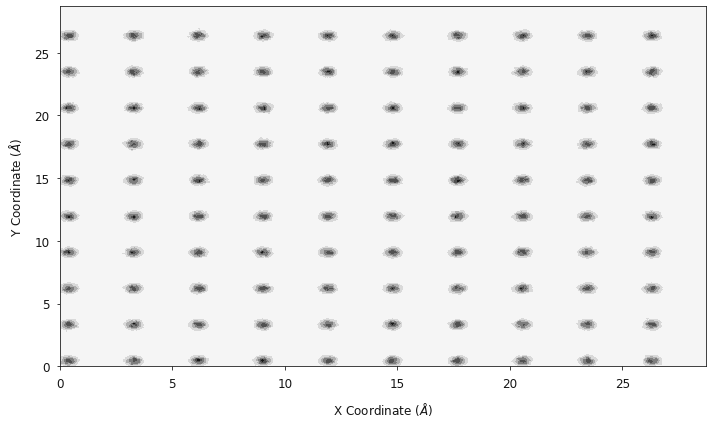

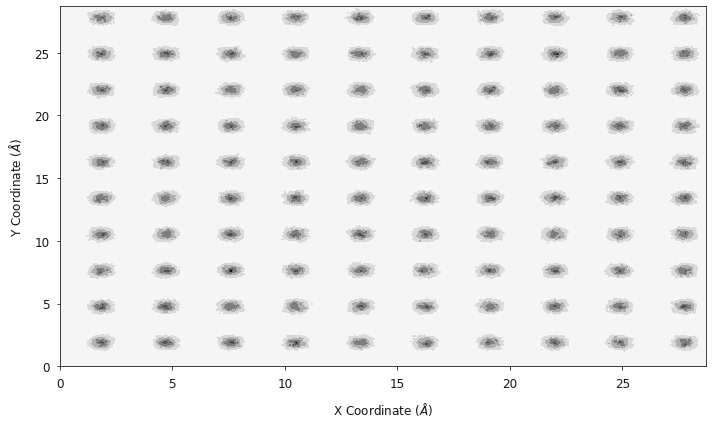

In [8]:
volume, step = analysis.system_volume(history.trajectory)

cx_2d, cy_2d, cz_2d, c_volume = ca_density.two_dimensional_density(direction="x")

fx_2d, fy_2d, fz_2d, f_volume = f_density.two_dimensional_density(direction="x")

fig, ax = plotting.two_dimensional_density_plot(cx_2d, cy_2d, cz_2d, colorbar=False, palette="Greys")
plt.show()

fig, ax = plotting.two_dimensional_density_plot(fx_2d, fy_2d, fz_2d, colorbar=False, palette="Greys")
plt.show()

### Charge Density

In the same fashion as the one dimensional case, the charge density can be evaluated in two dimensions using the two_dimensional_charge_density function. 

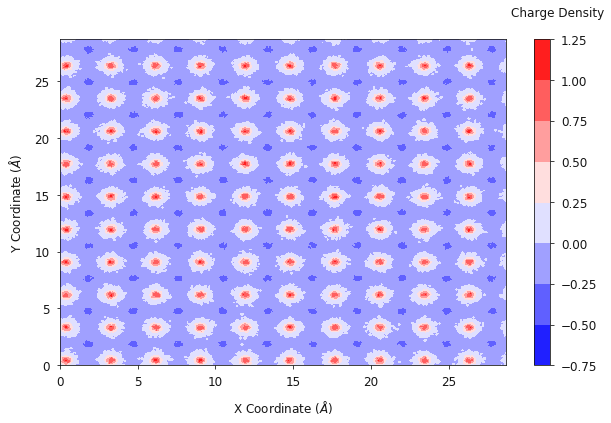

In [9]:
charge_density = analysis.two_dimensional_charge_density([fz_2d, cz_2d], [-1.0, 2.0], f_volume, history.trajectory.timesteps)

fig, ax = plotting.two_dimensional_charge_density_plot(fx_2d, fy_2d, charge_density, palette='bwr')

plt.show()

## One and Two Dimensions

Finally, the contour plots can give a good understanding of the average positions of the atoms (or the location of the lattice sites) however it does not give a good representation of how many species are actually there. The one_and_two_dimensional_overlay function will evaluate the particle dnesity in one and two dimensions and then overlay the two on to a single plot, allowing both the lattice sites, and total density to be viewed. 

/opt/anaconda3/lib/python3.7/site-packages/polypy-0.5-py3.7.egg/polypy/plotting.py:286: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


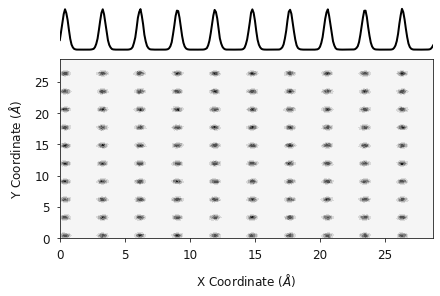

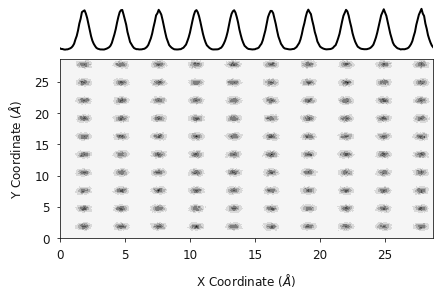

In [10]:
fig, gs = plotting.combined_density_plot(cx_2d, cy_2d, cz_2d, palette="Greys", linecolor="black")
plt.show()

fig, ax = plotting.combined_density_plot(fx_2d, fy_2d, fz_2d, palette="Greys", linecolor="black")

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/polypy-0.5-py3.7.egg/polypy/plotting.py:313: UserWarning: Log scale: values of z <= 0 have been masked
  ax1.contourf(x_list[i], y_list[i], z_list[i], cmap=palette_list[i], locator=ticker.LogLocator())


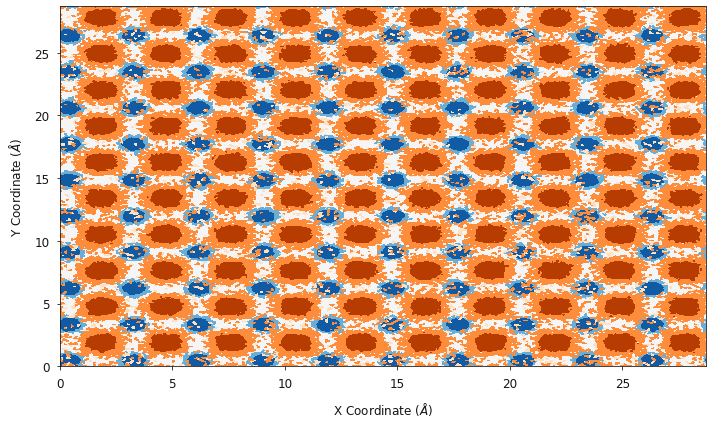

In [11]:
fig, ax = plotting.two_dimensional_density_plot_multiple_species([cx_2d, fx_2d], [cy_2d, fy_2d], [cz_2d, fz_2d], ["Blues", "Oranges"], log=True)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/polypy-0.5-py3.7.egg/polypy/plotting.py:354: UserWarning: Log scale: values of z <= 0 have been masked
  ax1.contourf(x_list[i], y_list[i], z_list[i], cmap=palette_list[i], locator=ticker.LogLocator())
/opt/anaconda3/lib/python3.7/site-packages/polypy-0.5-py3.7.egg/polypy/plotting.py:369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


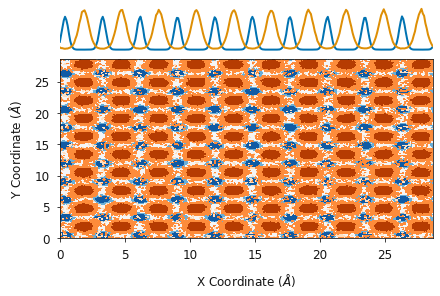

In [12]:
fig, ax = plotting.combined_density_plot_multiple_species([cx_2d, fx_2d], [cy_2d, fy_2d], [cz_2d, fz_2d], ["Blues", "Oranges"], log=True)
plt.show()